In [1]:
from FPAR_utils import fpar_utils

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%matplotlib inline

In [3]:
fp = fpar_utils()

In [4]:
fp.coords_to_ind(38, -90),fp.coords_to_ind(42, -90),fp.coords_to_ind(38, -86),fp.coords_to_ind(42, -86)

((2206, 6334), (1471, 6334), (2206, 7069), (1471, 7069))

In [6]:
lo, hi, left, right = 1471, 2206, 6334, 7069

In [54]:
in_mat = np.zeros((735, 735, 25))

In [55]:
start = 113
prefix = 'data/FPAR_A2016'
suffix = '.hdf'
for i in range(25):
    print('iteration', i)
    date = str(start + i*8)
    fpar_path = prefix + date + suffix
    fp.read_fpar(fpar_path)
    fpar, qc, laiqc = fp.get_fpar_directedly(lo, hi, left, right)
    fpar_filtered = fp.strong_filter_fpar(fpar, qc, laiqc)
    in_mat[:,:,i] = fpar_filtered

# fp.read_fpar('data/FPAR_A2016177.hdf')

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24


In [67]:
out_mat = np.zeros((735, 735, 25))

for i in range(735):
    for j in range(735):
        ts = in_mat[i,j,:]
        mask = np.isnan(ts)
        if np.sum(mask) < len(ts):
            ts[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), ts[~mask])
            sg_filtered = savgol_filter(ts, 5,3)
            out_mat[i,j,:] = sg_filtered

array([ 39.94285714,  40.22857143,  39.65714286,  36.92857143,
        38.48571429,  47.3       ,  61.64285714,  71.58571429,
        77.42142857,  79.61428571,  81.44285714,  82.5       ,
        83.6       ,  86.24285714,  85.85      ,  81.17142857,
        73.21904762,  66.0952381 ,  61.14285714,  59.42857143,
        60.        ,  60.        ,  60.        ,  60.        ,  60.        ])

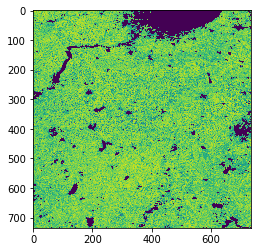

In [82]:
plt.imshow(out_mat[:,:,15])


out_mat[10,12,:]

In [76]:
np.save('sg_fpar_38428690.npy', out_mat)
np.save('filtered_fpar_38428690.npy', in_mat)

In [62]:
a = np.array([1,2,np.NaN,3])
any(a) == np.NaN

False

[ 50.          50.          50.          46.          50.5         55.          58.
  65.          65.5         66.          66.2         66.4         66.6
  66.8         67.          66.66666667  66.33333333  66.          60.          60.        ]
[ 50.          50.          50.          46.          50.5         55.          58.
  65.          65.5         66.          66.2         66.4         66.6
  66.8         67.          66.66666667  66.33333333  66.          60.          60.        ]


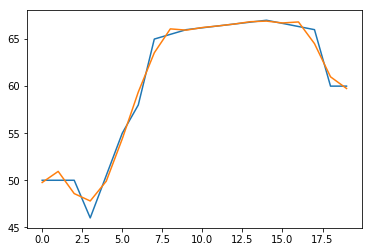

In [51]:
ts = in_mat[1,100,:]
print(ts)
mask = np.isnan(ts)
ts[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), ts[~mask])
print(ts)
sg_filtered = savgol_filter(ts, 5,3)
sg_filtered
plt.plot(ts)
plt.plot(sg_filtered)

In [8]:
fp.strong_filter_fpar(fpar, qc, laiqc)


array([[ nan,  nan,  nan, ...,  nan,  61.,  48.],
       [ 76.,  nan,  68., ...,  70.,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  55.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [10]:
unique, count = np.unique(fp.strong_filter_fpar(fpar, qc, laiqc), return_counts = True)